<a href="https://colab.research.google.com/github/MadhuvanthiThanikachalam/Machine-learning/blob/main/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/2019.csv")

In [ ]:
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [ ]:
df.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [ ]:
#Dealing with categorical features
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Freedom to make life choices'] = le.fit_transform(df['Freedom to make life choices'])

In [ ]:
df

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,125,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,124,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,127,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,123,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,115,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,113,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,69,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,21,0.235,0.035


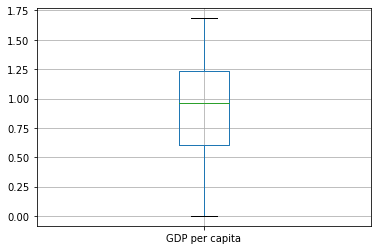

In [ ]:
df.boxplot(column=['GDP per capita'])

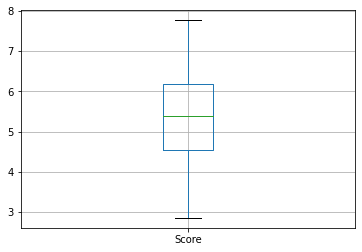

In [ ]:
df.boxplot(column=['Score'])

In [ ]:
df.describe().columns

Index(['Overall rank', 'Score', 'GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [ ]:
import seaborn as sb
df.corr()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Overall rank,1.000000,-0.989096,-0.801947,-0.767465,-0.787411,-0.550392,-0.047993,-0.351959
Score,-0.989096,1.000000,0.793883,0.777058,0.779883,0.565368,0.075824,0.385613
GDP per capita,-0.801947,0.793883,1.000000,0.754906,0.835462,0.387685,-0.079662,0.298920
Social support,-0.767465,0.777058,0.754906,1.000000,0.719009,0.429796,-0.048126,0.181899
Healthy life expectancy,-0.787411,0.779883,0.835462,0.719009,1.000000,0.408277,-0.029511,0.295283
Freedom to make life choices,-0.550392,0.565368,0.387685,0.429796,0.408277,1.000000,0.313153,0.487900
Generosity,-0.047993,0.075824,-0.079662,-0.048126,-0.029511,0.313153,1.000000,0.326538
Perceptions of corruption,-0.351959,0.385613,0.298920,0.181899,0.295283,0.487900,0.326538,1.000000


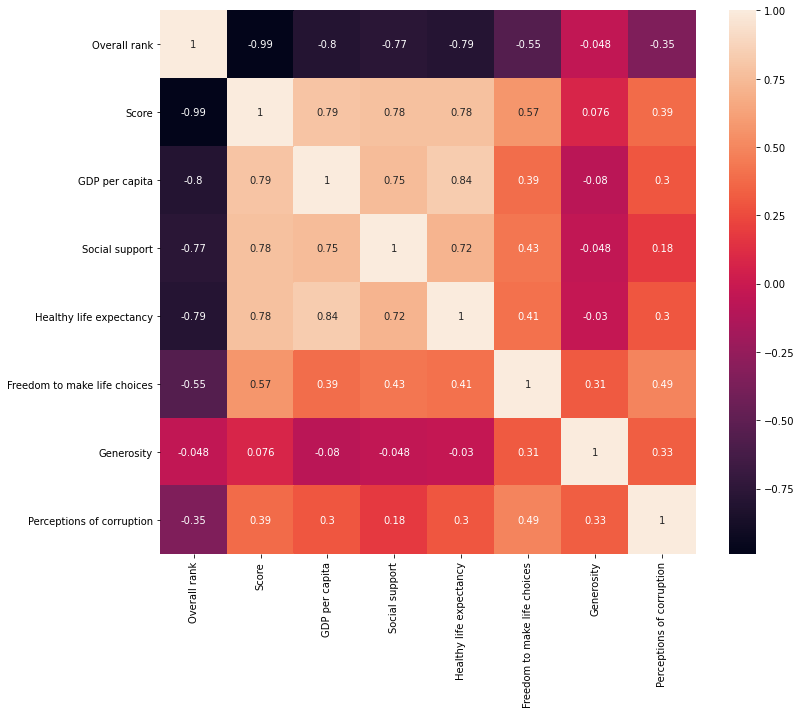

In [ ]:
plt.rcParams['figure.figsize']=12,10
sb.heatmap(df.corr(),annot=True)

In [ ]:
df['Country or region'].value_counts()

Ivory Coast    1
Slovakia       1
Morocco        1
Algeria        1
Moldova        1
              ..
Uzbekistan     1
Kyrgyzstan     1
Belgium        1
Chile          1
Canada         1
Name: Country or region, Length: 156, dtype: int64

In [ ]:
X = df[['Overall rank', 'GDP per capita', 'Social support','Healthy life expectancy', 'Freedom to make life choices', 'Generosity','Perceptions of corruption']]
Y= df[['Score']].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.4)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((62, 7), (94, 7), (62, 1), (94, 1))

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
Y_pred = lr.predict(X_test)
Y_pred

In [ ]:
Y_pred1=lr.predict(X_train)
Y_pred1

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [ ]:
mean_squared_error(Y_test,Y_pred)

0.03443374873491552

In [ ]:
mean_absolute_error(Y_test,Y_pred)

0.1317547319595777

In [ ]:
X = df[['GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']]
Y = df[['Score']].values

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.4)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((62, 6), (94, 6), (62, 1), (94, 1))

In [ ]:
lr=LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
Y_pred = lr.predict(X_test)
Y_pred

In [ ]:
Y_pred1=lr.predict(X_train)
Y_pred1

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mean_squared_error(Y_test,Y_pred)

0.3195599740575675

In [ ]:
mean_absolute_error(Y_test,Y_pred)

0.43466111890472153

In [ ]:
X = df[['Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']]
Y = df[['Score']].values

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.4)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((62, 5), (94, 5), (62, 1), (94, 1))

In [ ]:
lr=LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mean_squared_error(Y_test,Y_pred)

2.1229240275861767

In [ ]:
mean_absolute_error(Y_test,Y_pred)

1.165604437326062

In [ ]:
X = df[['Healthy life expectancy', 'Freedom to make life choices', 'Generosity','Perceptions of corruption']]
Y = df[['Score']].values

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.4)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((62, 4), (94, 4), (62, 1), (94, 1))

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mean_squared_error(Y_test,Y_pred)

1.8219143178857313

In [ ]:
mean_absolute_error(Y_test,Y_pred)

1.0722737031357203

In [ ]:
X = df[['Freedom to make life choices', 'Generosity','Perceptions of corruption','Overall rank']]
Y = df[['Score']].values

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.4)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((62, 4), (94, 4), (62, 1), (94, 1))

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mean_squared_error(Y_test,Y_pred)

1.8872003247216553

In [ ]:
mean_absolute_error(Y_test,Y_pred)

1.085139375497264

In [ ]:
X = df[['Generosity','Perceptions of corruption','Overall rank']]
Y = df[['Score']].values

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.4)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((62, 3), (94, 3), (62, 1), (94, 1))

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mean_squared_error(Y_test,Y_pred)

2.0201038348397744

In [ ]:
mean_absolute_error(Y_test,Y_pred)

1.1293759294077603

In [ ]:
X = df[['Generosity','Perceptions of corruption']]
Y = df[['Score']].values

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.4)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((62, 2), (94, 2), (62, 1), (94, 1))

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mean_squared_error(Y_test,Y_pred)

1.7737485762344785

In [ ]:
mean_absolute_error(Y_test,Y_pred)

1.0564581877515486

In [ ]:
X = df[['Perceptions of corruption']]
Y = df[['Score']].values

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.4)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((62, 1), (94, 1), (62, 1), (94, 1))

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mean_squared_error(Y_test,Y_pred)

2.0323557370006164

In [ ]:
mean_absolute_error(Y_test,Y_pred)

1.1813244065672959